In [1]:
import pandas as pd
from sklearn import linear_model
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import linear_model,ensemble,metrics,preprocessing
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import cv2
from ImageFeatures import *

/Users/richardknoche/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:1035: UserWarning: Duplicate key in file "/Users/richardknoche/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


In [2]:
#Get "amateur" photos
ama_df = pd.read_csv('AllImages.csv')
ama_df.drop('Unnamed: 0',axis=1,inplace=True)
ama_df = ama_df.dropna()

#Select unedited, non-front page images
ama_df_all = ama_df
ama_df=ama_df[ (ama_df['frac_white']<0.001) & (ama_df['is_main']==False)]

ama_df['is_prof']=0

/Users/richardknoche/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [3]:
#Get professional photos
prof_df = pd.read_csv("ProfessionalImageFeatures_new.csv")
prof_df.drop('Unnamed: 0',axis=1,inplace=True)
prof_df = prof_df.dropna()
prof_df['is_prof']=1

In [4]:
#Combine the two dataframe
features = ['Horizontal_Saturation_Sym', 'Thirds_To_Focal_Distance',
       'Vertical_Value_Sym', 'Salient_Saturation',
       'S_var', 'Thirds_Value', 'V_var', 'FFT_Sharpness', 'R_Mean', 'g_ygrad',
       'Thirds_Vertical_Value_Sym', 'Thirds_Sat', 'b_xgrad_std', 'g_xgrad_std',
       'Thirds_Horizontal_Saliency_Sym', 'Thirds_Saliency', 'G_Mean',
       'Salient_Hue', 'Histogram_Darkness', 'r_ygrad_std', 'Colorfulness',
       'Vertical_Saturation_Sym', 'G_Width', 'H_mean',
       'Thirds_Vertical_Saliency_Sym', 'Thirds_Vertical_Saturation_Sym',
       'r_xgrad_std', 'Lapacian_Saturation', 'Horizontal_Hue_Sym', 'b_ygrad',
       'B_Width', 'g_ygrad_std', 'r_ygrad', 'percieved_luminace',
       'Salient_Value', 'V_mean', 'Thirds_Horizontal_Saturation_Sym',
       'Number_of_Contours', 'Lapacian_Value', 'Complimentary_Color_Level',
       'Vertical_Hue_Sym', 'R_xgrad', 'H_var', 'Horizontal_Value_Sym',
       'Thirds_Horizontal_Value_Sym', 'b_ygrad_std', 'Thirds_Hue', 'g_xgrad',
       'S_mean', 'Laplacian_Sharpness', 'Busyness', 'Thirds_Vertical_Hue_Sym',
       'Lapacian_Hue', 'B_Mean', 'b_xgrad', 'standard_luminance',
       'Thirds_Horizontal_Hue_Sym', 'R_Width']




In [5]:
df=pd.concat([ama_df[features +['is_prof','product_id','is_main','path']],prof_df[features +['is_prof','path']]]).reset_index()

In [6]:
#Randomize the data
df = df.sample(frac=1,random_state=102)

In [7]:
col_to_predict = 'is_prof'

num_minority = min(len(df[df[col_to_predict]==False]),len(df[df[col_to_predict]==True]))
true_df = df[df[col_to_predict]==True]
false_df = df[df[col_to_predict]==False]

train_true = true_df.sample(n=np.floor(num_minority*0.6),random_state = 102)
train_false = false_df.sample(n=np.floor(num_minority*0.6),random_state = 102)

train = pd.concat([train_true,train_false])
test = df.drop(train.index)

/Users/richardknoche/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:2644: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  locs = rs.choice(axis_length, size=n, replace=replace, p=weights)


# Train Classifier

In [8]:
features = ['Horizontal_Saturation_Sym', 'Thirds_To_Focal_Distance',
       'Vertical_Value_Sym', 'Salient_Saturation',
       'Thirds_Value', 'FFT_Sharpness',
       'Thirds_Vertical_Value_Sym',
       'Thirds_Horizontal_Saliency_Sym', 'Thirds_Saliency',
       'Salient_Hue', 'Histogram_Darkness', 'Colorfulness',
       'Vertical_Saturation_Sym',
       'Thirds_Vertical_Saliency_Sym', 'Thirds_Vertical_Saturation_Sym',
       'Horizontal_Hue_Sym',
       'percieved_luminace',
       'Salient_Value', 'Thirds_Horizontal_Saturation_Sym',
       'Number_of_Contours', 'Complimentary_Color_Level',
       'Vertical_Hue_Sym', 'Horizontal_Value_Sym',
       'Thirds_Horizontal_Value_Sym', 'Thirds_Hue',
       'Busyness', 'Thirds_Vertical_Hue_Sym',
       'standard_luminance',
       'Thirds_Horizontal_Hue_Sym']

In [9]:
train_x = train[features]
train_y = train[col_to_predict]

test_x = test[features]
test_y = test[col_to_predict]

#cv_x = cv[features]
#cv_y = cv['view_rate']




In [10]:
#Normalize features
std_scale = preprocessing.StandardScaler().fit(train_x)
minmax_scale = preprocessing.MinMaxScaler().fit(train_x)

train_x_std = std_scale.transform(train_x)
train_x_minmax = minmax_scale.transform(train_x)

test_x_std = std_scale.transform(test_x)
test_x_minmax = minmax_scale.transform(test_x)

train_x_features = train_x
test_x_features = test_x


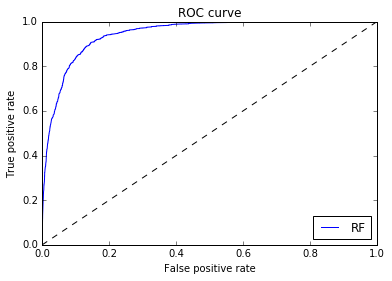

AUC:  0.945180352963
Accuracy:  0.871158623022
0.827793303315


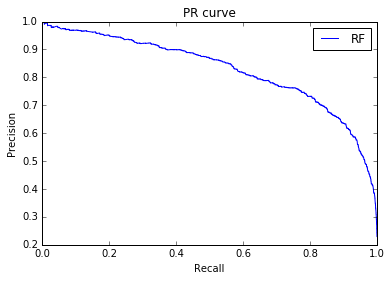

,F-Score,Precision,Recall,Support
Amateur,0.913222,0.966300,0.865671,60218
Professional,0.749956,0.647477,0.890975,16675


In [11]:
from sklearn import tree
from sklearn.naive_bayes import GaussianNB


#Train Model
clf = ensemble.AdaBoostClassifier() #Great and gaussian results
#clf = ensemble.GradientBoostingClassifier() #Awful results
#clf  = ensemble.RandomForestClassifier() #Non-gaussian star rankings
#clf = linear_model.LogisticRegression(penalty='l1') #non-gaussian star rankings
#clf = tree.DecisionTreeClassifier() #non-gaussian results
clf.fit(train_x_features,train_y)
predicted_y = clf.predict(test_x_features)
y_probs =clf.predict_proba(test_x_features)[:, 1]

#ROC
fpr, tpr, thresholds = metrics.roc_curve(test_y, y_probs)
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
print("AUC: ",metrics.auc(fpr, tpr))

#Accuracy, Precision, Recall
print('Accuracy: ',clf.score(test_x_features,test_y))
f1score, tpr, thresholds = metrics.roc_curve(test_y, y_probs)

precision, recall, thresholds = precision_recall_curve(test_y,y_probs)
average_precision = average_precision_score(test_y, y_probs)
print(average_precision)


#Prec-Recall Curve
plt.figure()
plt.plot([0, 1], [1, 1], 'k--')
plt.plot(recall, precision,label='RF')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.legend(loc='best')
plt.show()


precision, recall, fscore, support = metrics.precision_recall_fscore_support(test_y, predicted_y)
classifier_metrics = pd.DataFrame( {'Precision' : precision, 'Recall' : recall, 'F-Score' : fscore, 'Support' : support})
classifier_metrics.index=['Amateur','Professional']
classifier_metrics

In [12]:
#For RF
importances = clf.feature_importances_
#For LR
#importances = clf.coef_[0]

indices = np.argsort(importances)[::-1]


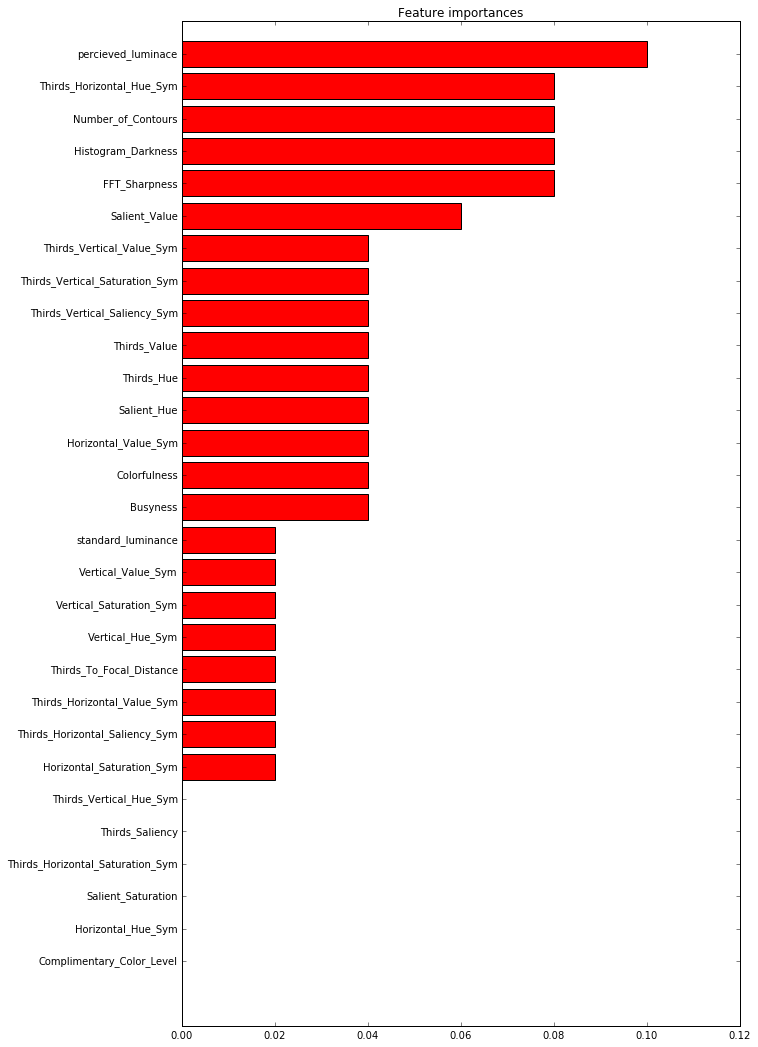

In [13]:
sorted_importances = [importance for (importance,feature) in sorted(zip(importances,features),reverse=True)]
sorted_features = [feature for (importance,feature) in sorted(zip(importances,features),reverse=True)]   
    
plt.figure(figsize=(10,18))
plt.title("Feature importances")
plt.barh(range(len(sorted_features),0,-1), sorted_importances,
       color="r", align="center")
plt.yticks(range(len(sorted_features),0,-1))
ax=plt.gca()
ax.set_yticklabels(sorted_features)
plt.ylim([-1, len(sorted_features)+1])
plt.show()

# Save the classifier

In [ ]:
import pickle
save = True
if save == True:
    with open('image_classifier.pkl', 'wb') as f:
        pickle.dump(clf, f)

    with open('image_classifier_features.pkl', 'wb') as f:
        pickle.dump(features, f)

# Using Lime to interpret the results

In [ ]:
train_imgs = train['path']
test_imgs = test['path']

In [ ]:

#From http://marcotcr.github.io/lime/tutorials/Tutorial%20-%20continuous%20and%20categorical%20features.html
from lime import lime_text,lime_tabular
from lime.lime_text import LimeTextExplainer
class_names=['Amateur','Professional']
explainer = lime_tabular.LimeTabularExplainer(np.array(train_x_features), feature_names=features, class_names=class_names, discretize_continuous=True)

idx = 7
df_idx = test_imgs.index[idx]
print('True class: %s' % class_names[test_y[df_idx]])
print('Probability(FrontPage) =', clf.predict_proba(test_x_features.loc[df_idx].values.reshape(1,-1))[0][1] )

exp = explainer.explain_instance(np.array(test_x_features.loc[df_idx]), clf.predict_proba, num_features=6)
exp.show_in_notebook(show_table=True, show_all=False,)

#Get Image
image = url_to_image(test_imgs.iloc[idx])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Test to see if it can pick out the "best" image

In [14]:
def CalcProb(row):
    row['IsProf_Prob'] = clf.predict_proba(df.ix[0,features])



In [15]:
df['PredictedClass']=clf.predict(df[features])
df['IsProf_Prob']=clf.predict_proba(df[features])[:,1]

ama_df_all['PredictedClass']=clf.predict(ama_df_all[features])
ama_df_all['IsProf_Prob']=clf.predict_proba(ama_df_all[features])[:,1]


ama_df['PredictedClass']=clf.predict(ama_df[features])
ama_df['IsProf_Prob']=clf.predict_proba(ama_df[features])[:,1]


/Users/richardknoche/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/richardknoche/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[  5.11677236e-01   7.72334780e-03   1.74698431e+03   4.90900303e-01
   1.67990909e-02   5.21792554e+03] 
 [  8.40587087e-04   1.55074368e-03   5.03291435e+02   1.52550057e-03
   9.17119004e-04   1.74385408e+02]


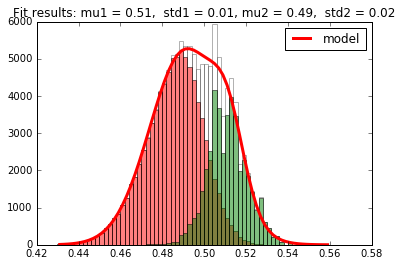

In [21]:
from pylab import *
from scipy.optimize import curve_fit

bins=np.arange(0.43,0.56,0.002)

# Plot the histogram.
y,x,_ = plt.hist(df['IsProf_Prob'],bins=bins, normed=False, alpha=.3, color=[1,1,1])
x=(x[1:]+x[:-1])/2 # for len(x)==len(y)

def gauss(x,mu,sigma,A):
    return A*exp(-(x-mu)**2/2/sigma**2)

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

expected=(0.47,.04,3000,0.53,.04,3000)
params,cov=curve_fit(bimodal,x,y,expected)
sigma=sqrt(diag(cov))
plot(x,bimodal(x,*params),color='red',lw=3,label='model')
legend()
print(params,'\n',sigma)    

title = "Fit results: mu1 = %.2f,  std1 = %.2f, mu2 = %.2f,  std2 = %.2f" % (params[0],params[1],params[3],params[4])
plt.title(title)
_,_,_ = plt.hist(df[df['is_prof']==False]['IsProf_Prob'],bins=bins,alpha=0.5,color='r')
_,_,_ = plt.hist(df[df['is_prof']==True]['IsProf_Prob'],bins=bins,alpha=0.5,color='g')

plt.show()

In [ ]:
temp = [params[0],params[3]]
mu = min(temp)


if temp.index(mu)==1:
    std=params[4]
else:
    std=parmas[1]
    
if save == True:
    with open('classifier_mu_std.pkl', 'wb') as f:
        pickle.dump([mu,std], f)

[  4.90264364e-01   1.57754964e-02   6.61490696e+03] 
 [  2.13014818e-04   2.13016277e-04   7.73535166e+01]


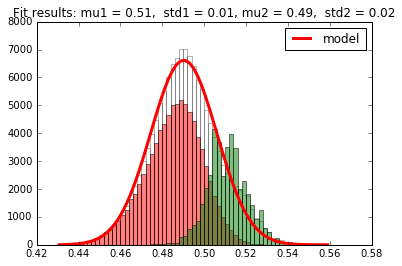

In [26]:
# Plot the histogram.
y,x,_ = plt.hist(ama_df_all['IsProf_Prob'],bins=bins, normed=False, alpha=.3, color=[1,1,1])
x=(x[1:]+x[:-1])/2 # for len(x)==len(y)

expected=(0.47,.04,3000)
params,cov=curve_fit(gauss,x,y,expected)
sigma=sqrt(diag(cov))
plot(x,gauss(x,*params),color='red',lw=3,label='model')
legend()
print(params,'\n',sigma)    

plt.title(title)
_,_,_ = plt.hist(ama_df['IsProf_Prob'],bins=bins,alpha=0.5,color='r')
_,_,_ = plt.hist(df[df['is_prof']==True]['IsProf_Prob'],bins=bins,alpha=0.5,color='g')


In [27]:
def StarRanking(row):
    stars = (row['IsProf_Prob']-params[0])/(params[1])+3
    #if stars <0:
        #stars = 0
    #if stars >5:
        #stars = 5
    return stars
                 
df['StarRanking']=df.apply(StarRanking,axis=1)
ama_df_all['StarRanking']=ama_df_all.apply(StarRanking,axis=1)
ama_df['StarRanking']=ama_df.apply(StarRanking,axis=1)

/Users/richardknoche/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [92]:
#Compare within listings for all AptDeco images
sorted_df = ama_df.sort_values('product_id')[['view_rate','IsProf_Prob','product_id','is_main','StarRanking','path','Histogram_Darkness']].dropna().reset_index()

#600704
for idx in range(0,20):
    print(int(sorted_df.ix[idx,'product_id']),bool(sorted_df.ix[idx,'is_main']),'%0.2f' % sorted_df.ix[idx,'StarRanking'],sorted_df.ix[idx,'path'])
    print('     ')

384201 False 2.51 https://d6qwfb5pdou4u.cloudfront.net/product-images/380001-390000/384201/1471384234f27d25ffd27dcc9d482347d00b29c056/200-200-crop-0.jpg
     
384201 False 2.40 https://d6qwfb5pdou4u.cloudfront.net/product-images/380001-390000/384201/1471384295f1f93a0740de4f5d5b3169b0b6cdbf9d/200-200-crop-0.jpg
     
384201 False 2.08 https://d6qwfb5pdou4u.cloudfront.net/product-images/380001-390000/384201/14713842504842f6abc7e4c8367efec244d35fe77a/200-200-crop-0.jpg
     
384201 False 2.78 https://d6qwfb5pdou4u.cloudfront.net/product-images/380001-390000/384201/14713842634757e2457bc42f5ec92de62773ecf93a/200-200-crop-0.jpg
     
384201 False 1.62 https://d6qwfb5pdou4u.cloudfront.net/product-images/380001-390000/384201/14713842803bc8a5c960adb23b221bcddf16413389/200-200-crop-0.jpg
     
384206 False 1.38 https://d6qwfb5pdou4u.cloudfront.net/product-images/380001-390000/384206/1471384785c0d8fc9adcb7f0e6f8821cf88a92d71e/200-200-crop-0.jpg
     
384206 False 2.29 https://d6qwfb5pdou4u.cloudf

In [93]:
#Check bad images
sorted_df.sort_values('IsProf_Prob').ix[:15,'path'].tolist()

['https://d6qwfb5pdou4u.cloudfront.net/product-images/380001-390000/384501/14719127920aa3fe5a7c77bf1fe3bf3a78376068cc/200-200-crop-0.jpg',
 'https://d6qwfb5pdou4u.cloudfront.net/product-images/480001-490000/488594/14762881154054f48812535a3e4290eb808b6b6b57/200-200-crop-0.jpg',
 'https://d6qwfb5pdou4u.cloudfront.net/product-images/630001-640000/636870/1483393156577fc744d45c9ea8d00a738fd6bff33b/200-200-crop-90.jpg',
 'https://d6qwfb5pdou4u.cloudfront.net/product-images/670001-680000/672829/1485013530937e1231c861192f99552d51659276fc/200-200-crop-0.jpg',
 'https://d6qwfb5pdou4u.cloudfront.net/product-images/500001-510000/507959/1477147790864188c83ce8bcac17747cfa147b8235/200-200-crop-0.jpg',
 'https://d6qwfb5pdou4u.cloudfront.net/product-images/390001-400000/397975/147278364116c11b65da67cf1ef7567efd9a60a897/200-200-crop-0.jpg',
 'https://d6qwfb5pdou4u.cloudfront.net/product-images/590001-600000/599188/14812973171ac995298df93b4b021238eecfca4299/200-200-crop-0.jpg',
 'https://d6qwfb5pdou4u.cl

In [94]:
#Check good images
sorted_df.sort_values('IsProf_Prob',ascending=False).ix[:15,'path'].tolist()

['https://d6qwfb5pdou4u.cloudfront.net/product-images/390001-400000/397814/1472316934b79347afdbeb61ea63212f8bfcb1c3dd/200-200-crop-0.jpg',
 'https://d6qwfb5pdou4u.cloudfront.net/product-images/590001-600000/591368/148091374492a7a2c1a1c036bd0037c870780d84c2/200-200-crop-0.jpg',
 'https://d6qwfb5pdou4u.cloudfront.net/product-images/570001-580000/578701/148037863074a19f07cbc52c166fe9629771f282e9/200-200-crop-0.jpg',
 'https://d6qwfb5pdou4u.cloudfront.net/product-images/580001-590000/583502/14806304341fcd2fbfa64da22bfd15ce0da2f2477f/200-200-crop-0.jpg',
 'https://d6qwfb5pdou4u.cloudfront.net/product-images/420001-430000/420143/14733424103c03675ca190e709455d2600a9e8d73c/200-200-crop-0.jpg',
 'https://d6qwfb5pdou4u.cloudfront.net/product-images/610001-620000/611026/148192141958713b7baf50512c06bec4bf053b8791/200-200-crop-0.jpg',
 'https://d6qwfb5pdou4u.cloudfront.net/product-images/590001-600000/598089/14812241978828d8d41cecc85b598dd8f58fc04eaf/200-200-crop-0.jpg',
 'https://d6qwfb5pdou4u.clo

In [95]:
#Max rating for each listing
max_stars = sorted_df.groupby('product_id').max()['StarRanking']

In [96]:
best_listings = max_stars.reset_index().sort_values('StarRanking',ascending=False)['product_id'].tolist()

In [97]:
worst_listings = max_stars.reset_index().sort_values('StarRanking',ascending=True)['product_id'].tolist()

In [98]:
current_prod = sorted_df[sorted_df['product_id']==best_listings[5002]].reset_index()
for idx in range(len(current_prod)):
    print(current_prod.ix[idx,'StarRanking'],current_prod.ix[idx,'path'])    

3.78400914286 https://d6qwfb5pdou4u.cloudfront.net/product-images/400001-410000/406189/14727587516021c746ee95fe96647e693bc322ad36/200-200-crop-0.jpg
2.84087234968 https://d6qwfb5pdou4u.cloudfront.net/product-images/400001-410000/406189/1472758797072884621068d42184cfbed92beb0ad0/200-200-crop-0.jpg
2.79134050775 https://d6qwfb5pdou4u.cloudfront.net/product-images/400001-410000/406189/1472759426316fe7536d10b2e95d8a32e26eea5d13/200-200-crop-0.jpg


In [99]:
current_prod = sorted_df[sorted_df['product_id']==worst_listings[100]].reset_index()
for idx in range(len(current_prod)):
    print(current_prod.ix[idx,'StarRanking'],current_prod.ix[idx,'Histogram_Darkness'],current_prod.ix[idx,'path'])

1.10945562097 87.4486833333 https://d6qwfb5pdou4u.cloudfront.net/product-images/480001-490000/487992/14762424354c9c8640a583959385d2151ea09a2bc1/200-200-crop-0.jpg
1.10945562097 87.4486833333 https://d6qwfb5pdou4u.cloudfront.net/product-images/480001-490000/487992/1476242430035a2f766097bdd3bcbf787e621d28d4/200-200-crop-0.jpg
1.10945562097 87.4486833333 https://d6qwfb5pdou4u.cloudfront.net/product-images/480001-490000/487992/14762424416086d742a2ada037bc2c7e91f68156cb/200-200-crop-0.jpg


# Look at max, mean, and std of star rankings within listings

In [100]:
max_df = sorted_df.groupby('product_id').max()
mean_df = sorted_df.groupby('product_id').mean()
std_df = sorted_df.groupby('product_id').std()

[  3.32524857e+00   6.70086482e-01   1.01188451e+03] 
 [  5.22429528e-03   5.22429529e-03   6.83211415e+00]


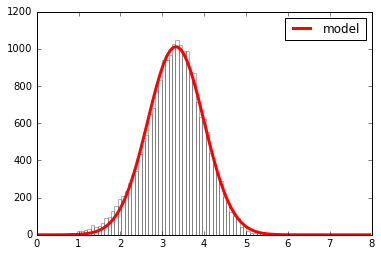

In [101]:
# Plot the histogram.
bins=np.linspace(0,8,100)
y,x,_ = plt.hist(max_df['StarRanking'],bins=bins, normed=False, alpha=.3, color=[1,1,1])
x=(x[1:]+x[:-1])/2 # for len(x)==len(y)

expected=(3,.1,3000)
params,cov=curve_fit(gauss,x,y,expected)
sigma=sqrt(diag(cov))
plot(x,gauss(x,*params),color='red',lw=3,label='model')
legend()
print(params,'\n',sigma)    

In [112]:
good_df = max_df[max_df['StarRanking']>params[0]+2*params[1]]

In [113]:
bad_df = max_df[max_df['StarRanking']<params[0]-2*params[1]]

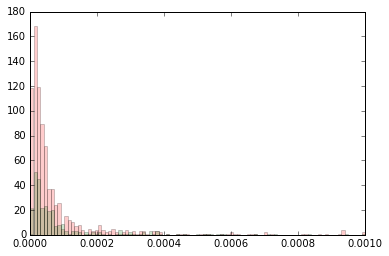

In [114]:
_,_,_ = plt.hist(bad_df['view_rate'],bins=np.linspace(0,0.001,100),color='r',alpha=0.2)
_,_,_ = plt.hist(good_df['view_rate'],bins=np.linspace(0,0.001,100),color='g',alpha=0.2)

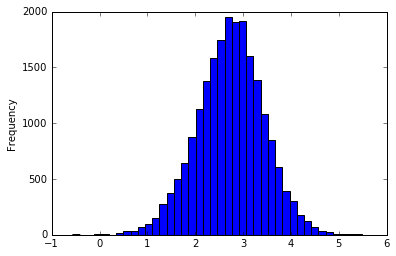

In [58]:
bad_df['view_rate'].plot.hist()

# Look into histograms of features for each class

In [ ]:
all_features = ['Horizontal_Saturation_Sym', 'Thirds_To_Focal_Distance',
       'Vertical_Value_Sym', 'Salient_Saturation',
       'S_var', 'Thirds_Value', 'V_var', 'FFT_Sharpness', 'R_Mean', 'g_ygrad',
       'Thirds_Vertical_Value_Sym', 'Thirds_Sat', 'b_xgrad_std', 'g_xgrad_std',
       'Thirds_Horizontal_Saliency_Sym', 'Thirds_Saliency', 'G_Mean',
       'Salient_Hue', 'Histogram_Darkness', 'r_ygrad_std', 'Colorfulness',
       'Vertical_Saturation_Sym', 'G_Width', 'H_mean',
       'Thirds_Vertical_Saliency_Sym', 'Thirds_Vertical_Saturation_Sym',
       'r_xgrad_std', 'Lapacian_Saturation', 'Horizontal_Hue_Sym', 'b_ygrad',
       'B_Width', 'g_ygrad_std', 'r_ygrad', 'percieved_luminace',
       'Salient_Value', 'V_mean', 'Thirds_Horizontal_Saturation_Sym',
       'Number_of_Contours', 'Lapacian_Value', 'Complimentary_Color_Level',
       'Vertical_Hue_Sym', 'R_xgrad', 'H_var', 'Horizontal_Value_Sym',
       'Thirds_Horizontal_Value_Sym', 'b_ygrad_std', 'Thirds_Hue', 'g_xgrad',
       'S_mean', 'Laplacian_Sharpness', 'Busyness', 'Thirds_Vertical_Hue_Sym',
       'Lapacian_Hue', 'B_Mean', 'b_xgrad', 'standard_luminance',
       'Thirds_Horizontal_Hue_Sym', 'R_Width']


In [ ]:
for i in range(len(all_features)):
    feat = all_features[i]
    plt.figure()
    _,_,_ = plt.hist(ama_df[feat],bins=np.linspace(df[feat].min(),df[feat].max(),50),alpha=0.2,color='r')
    _,_,_ = plt.hist(prof_df[feat],bins=np.linspace(df[feat].min(),df[feat].max(),50),alpha=0.2,color='g')
    plt.title(feat)

In [ ]:
bins=np.arange(0,8,0.2)

# Plot the histogram.
y,x,_ = plt.hist(df['StarRanking'],bins=bins, normed=False, alpha=.3, color=[1,1,1])
x=(x[1:]+x[:-1])/2 # for len(x)==len(y)

def gauss(x,mu,sigma,A):
    return A*exp(-(x-mu)**2/2/sigma**2)

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

expected=(3,.1,4000,3,.1,4000)
params,cov=curve_fit(bimodal,x,y,expected)
sigma=sqrt(diag(cov))
plot(x,bimodal(x,*params),color='red',lw=3,label='model')
legend()
print(params,'\n',sigma)    

title = "Fit results: mu1 = %.2f,  std1 = %.2f, mu2 = %.2f,  std2 = %.2f" % (params[0],params[1],params[3],params[4])
plt.title(title)
_,_,_ = plt.hist(df[df['is_prof']==False]['StarRanking'],bins=bins,alpha=0.5,color='r')
_,_,_ = plt.hist(df[df['is_prof']==True]['StarRanking'],bins=bins,alpha=0.5,color='g')

plt.show()

In [ ]:
params[0]-params[1]*1.5